## Run a Random Forest 

The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

The data set choosen talks about varies features which help predict if a person smokes regularly

### Import the required libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [49]:
data=pd.read_csv("D:\coursera\Machine Learning for data analysis\_tree_addhealth.csv")
data_na=data.dropna()
data_na.shape

(4575, 25)

### Understanding the data

In [50]:
data_na.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [51]:
data_na.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


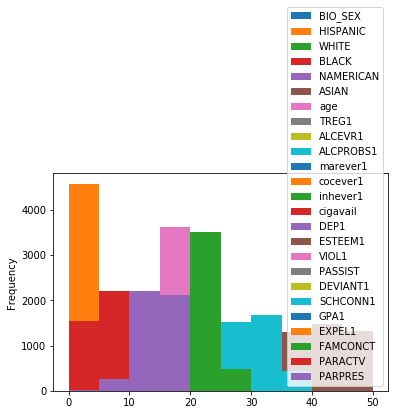

In [52]:
data_na.plot.hist()

### Spliting the data and building the classifier

In [53]:
X=data_na[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]
Y=data_na.TREG1

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [55]:
classifier=RandomForestClassifier(n_estimators=25,criterion='entropy')
classifier=classifier.fit(X_train,Y_train)

### Testing data

In [56]:
predictor=classifier.predict(X_test)
predictor

array([0., 0., 0., ..., 1., 0., 0.])

### Accuracy check

In [57]:
accuracy_score(Y_test,predictor)

0.839344262295082

In [58]:
confusion_matrix(Y_test,predictor)

array([[1431,   71],
       [ 223,  105]], dtype=int64)

### Identifying the most determining feature

In [59]:
sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), X), reverse=True)

[(0.0911, 'DEVIANT1'),
 (0.0907, 'age'),
 (0.0837, 'GPA1'),
 (0.0746, 'marever1'),
 (0.0736, 'SCHCONN1'),
 (0.0723, 'ESTEEM1'),
 (0.0704, 'DEP1'),
 (0.0686, 'FAMCONCT'),
 (0.0626, 'PARACTV'),
 (0.0532, 'ALCEVR1'),
 (0.045, 'ALCPROBS1'),
 (0.0436, 'PARPRES'),
 (0.0413, 'VIOL1'),
 (0.0272, 'WHITE'),
 (0.0249, 'cigavail'),
 (0.0151, 'BIO_SEX'),
 (0.0128, 'BLACK'),
 (0.0122, 'inhever1'),
 (0.0087, 'PASSIST'),
 (0.008, 'cocever1'),
 (0.0069, 'HISPANIC'),
 (0.006, 'EXPEL1'),
 (0.0048, 'NAMERICAN'),
 (0.0027, 'ASIAN')]

As observed above having access to marijuana is the largest contributor in predicting if a person smokes cigarettes 

### Checking the Accuracy with varying number of trees

In [60]:
trees=range(25)
accuracy=np.zeros(25)
for i in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=i+1)
    classifier=classifier.fit(X_train,Y_train)
    predictor=classifier.predict(X_test)
    accuracy[i]=accuracy_score(Y_test,predictor)
accuracy

array([0.79180328, 0.82021858, 0.81967213, 0.82677596, 0.83114754,
       0.83169399, 0.83169399, 0.83661202, 0.84153005, 0.83114754,
       0.83661202, 0.83879781, 0.83879781, 0.8420765 , 0.83715847,
       0.8284153 , 0.84098361, 0.84098361, 0.83333333, 0.83770492,
       0.83497268, 0.83551913, 0.83497268, 0.84590164, 0.83278689])

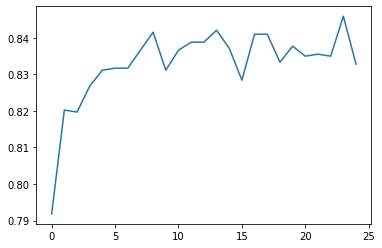

In [61]:
plt.cla()
plt.plot(trees,accuracy)

As you can see as the number of trees increase in the Random Forest the accuracy also increases